In [1]:
import pickle

import numpy as np
np.set_printoptions(threshold=np.inf)

import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
from matplotlib.lines import Line2D

In [2]:
model_name = "resnet"
train_name = "IN"
test_name = "IN"

classes = [
    'airplane', 'bear', 'bicycle', 'bird', 
    'boat', 'bottle', 'car', 'cat', 
    'chair', 'clock', 'dog', 'elephant',
    'keyboard', 'knife', 'oven', 'truck'
]


load_path = f'./neighbor_dict/{test_name}_to_{model_name}-{train_name}_neighbors_dict.pkl'
with open(load_path, mode='rb') as f:
    v_dicts = pickle.load(f)
    
load_path = f'./prediction_dict/{test_name}_to_{model_name}-{train_name}_prediction_dict.pkl'
with open(load_path, mode='rb') as f:
    p_dicts = pickle.load(f)

In [3]:
c = classes[0]
i = 0

neighbours = v_dicts[c][i]
preds      = p_dicts[c][i]

In [4]:
neighbours

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  4.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,
        6.,  0., 15.,  4.,  4.,  4.,  4., 15.,  2., 15., 15.,  4., 15.,
        4., 15.,  6.,  0., 15.,  6.,  4.,  6.,  0.,  6., 15., 15.,  2.,
       15., 15.,  6.,  4.,  6., 15., 15., 15.,  4., 15.,  6.,  4., 15.,
        6., 15., 15., 15., 15.,  6., 15.,  9.,  0., 15., 15.,  6.,  4.,
        6., 15.,  5., 15.,  9., 15.,  6., 15.,  6., 14., 15.,  6., 13.,
        9.,  4.,  6.,  6.,  4.,  2.,  6.,  6., 15.,  6.,  6.,  2.,  9.,
        6.,  9., 14.,  6.,  2., 15.,  6., 15., 15.,  6., 15.,  2., 15.,
        5., 15., 15.,  4.,  2., 15.,  4.,  6., 14., 15.,  6.,  6

In [5]:
preds

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [6]:
c_num = 0
neighbour_space = np.where(neighbours == c_num, 1, 0)

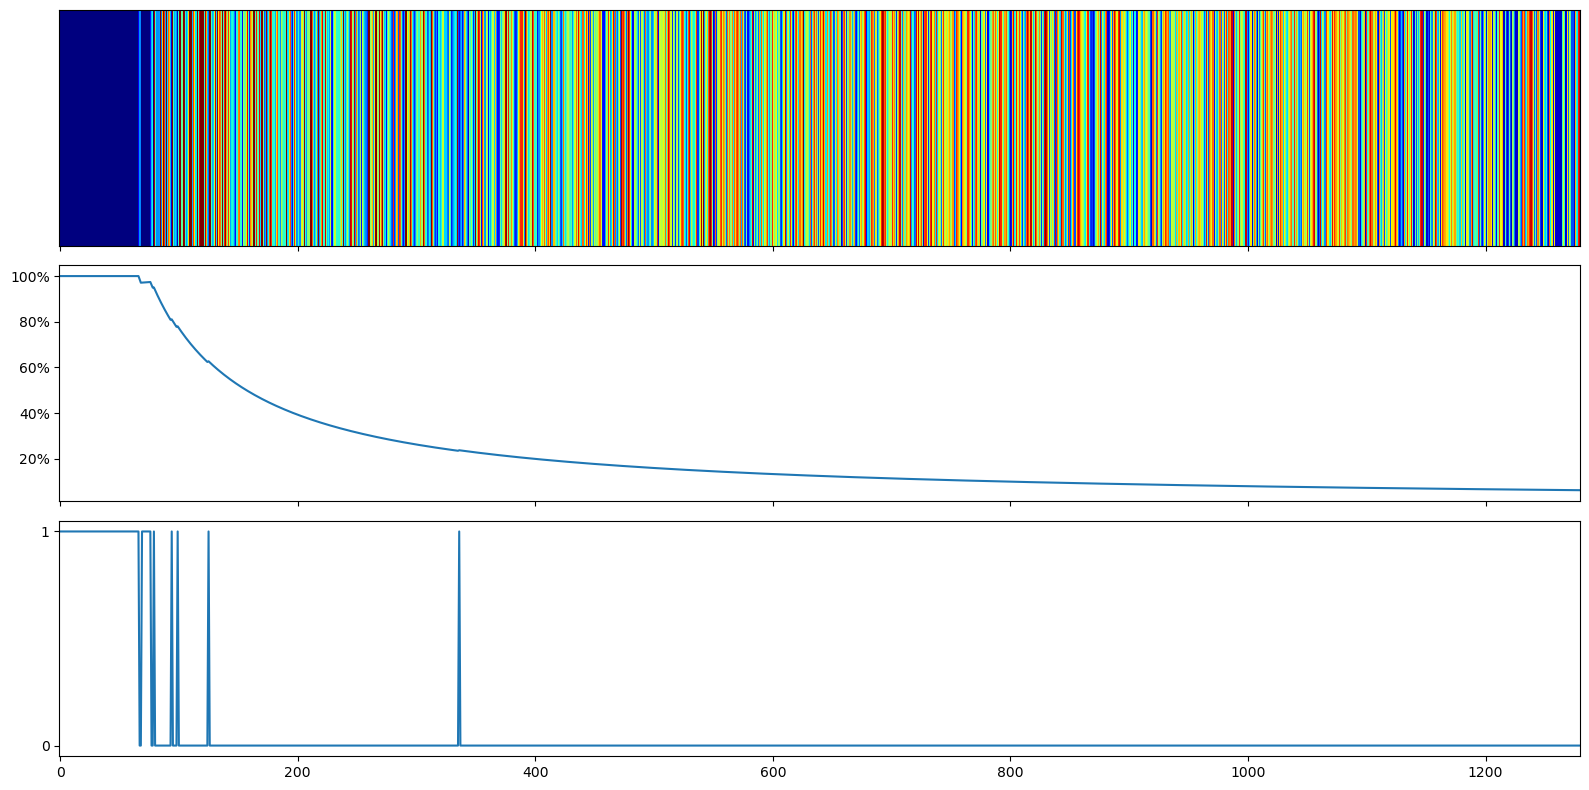

In [7]:
fig = plt.figure(1, figsize=(16, 8))
ax1,ax2, ax3 = fig.subplots(nrows=3, sharex=True)

ax1.imshow(neighbours[np.newaxis,:], cmap="jet", aspect="auto")
ax1.set_yticks([])

ax2.plot(np.cumsum(neighbour_space)/ (np.arange(neighbour_space.shape[0])+1) )
ax2.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0))

ax3.plot(neighbour_space)
ax3.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

## Metrics

In [8]:
dist = np.where(neighbour_space==1)[0]
dist.shape

(80,)

In [9]:
count = len(dist)
count

80

In [10]:
max = dist.max()
max

336

In [11]:
min = dist.min()
min

0

In [12]:
mean = np.sum(dist)/ dist.shape[0]
mean

44.05

In [13]:
var = np.sum((dist-mean)**2)/ (dist.shape[0]-1)
var

1750.3772151898734

In [14]:
std = np.sqrt(var)
std

41.837509667640035

In [15]:
md = np.median(dist)
md

39.5

In [16]:
acc = np.count_nonzero(np.where(preds == c_num, 1, 0)) / len(preds)
acc

1.0

In [17]:
def get_sorted_k_space(neighbours):
    
    index = []
    length = []
    clss    = []
    for i, v in enumerate(neighbours):
        
        cls = v[0]
        
        x = np.where(list(map(lambda x, *args: cls not in args, v, v[1:])))[0]
        x1 = 0 if len(x) == 0 else x[0]
        
        x = np.where(list(map(lambda x, *args: cls not in args, v, v[1:], v[2:])))[0]
        x2 = 0 if len(x) == 0 else x[0]
        
        x = np.where(list(map(lambda x, *args: cls not in args, v, v[1:], v[2:], v[3:])))[0]
        x3 = 0 if len(x) == 0 else x[0]
        
        x = np.where(list(map(lambda x, *args: cls not in args, v, v[1:], v[2:], v[3:], v[4:])))[0]
        x4 = 0 if len(x) == 0 else x[0]
        
        x = np.where(list(map(lambda x, *args: cls not in args, v, v[1:], v[2:], v[3:], v[4:], v[5:])))[0]
        x5 = 0 if len(x) == 0 else x[0]
        
        x = np.where(list(map(lambda x, *args: cls not in args, v, v[1:], v[2:], v[3:], v[4:], v[5:], v[6:])))[0]
        x6 = 0 if len(x) == 0 else x[0]
        
        x = np.where(list(map(lambda x, *args: cls not in args, v, v[1:], v[2:], v[3:], v[4:], v[5:], v[6:], v[7:])))[0]
        x7 = 0 if len(x) == 0 else x[0]
        
        x = np.where(list(map(lambda x, *args: cls not in args, v, v[1:], v[2:], v[3:], v[4:], v[5:], v[6:], v[7:], v[8:])))[0]
        x8 = 0 if len(x) == 0 else x[0]
        
        x = np.where(list(map(lambda x, *args: cls not in args, v, v[1:], v[2:], v[3:], v[4:], v[5:], v[6:], v[7:], v[8:], v[9:])))[0]
        x9 = 0 if len(x) == 0 else x[0]
        
        x = np.where(list(map(lambda x, *args: cls not in args, v, v[1:], v[2:], v[3:], v[4:], v[5:], v[6:], v[7:], v[8:], v[9:], v[10:])))[0]
        x10 = 0 if len(x) == 0 else x[0]
        
        # if np.bincount(v[:500].astype(int)).argmax() != i:
        #     x = -1*(9999 + np.bincount(v[:500].astype(int)).argmax() + x)
        
        index.extend([i])
        length.append([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10])
        clss.extend([v[x1+1]])
    
    length = np.array(length)
    
    values = {'index':index,  'class':clss}
    
    for i in range(10):
        values[f"length{i+1}"] = list(length[:, i])
    
    values[f"mean_length"] = list(length.mean(axis=1))
    
    df = pd.DataFrame(values).sort_values(['length1', 'class'], ascending = [True, True])
    return neighbours[df['index'].tolist()], df

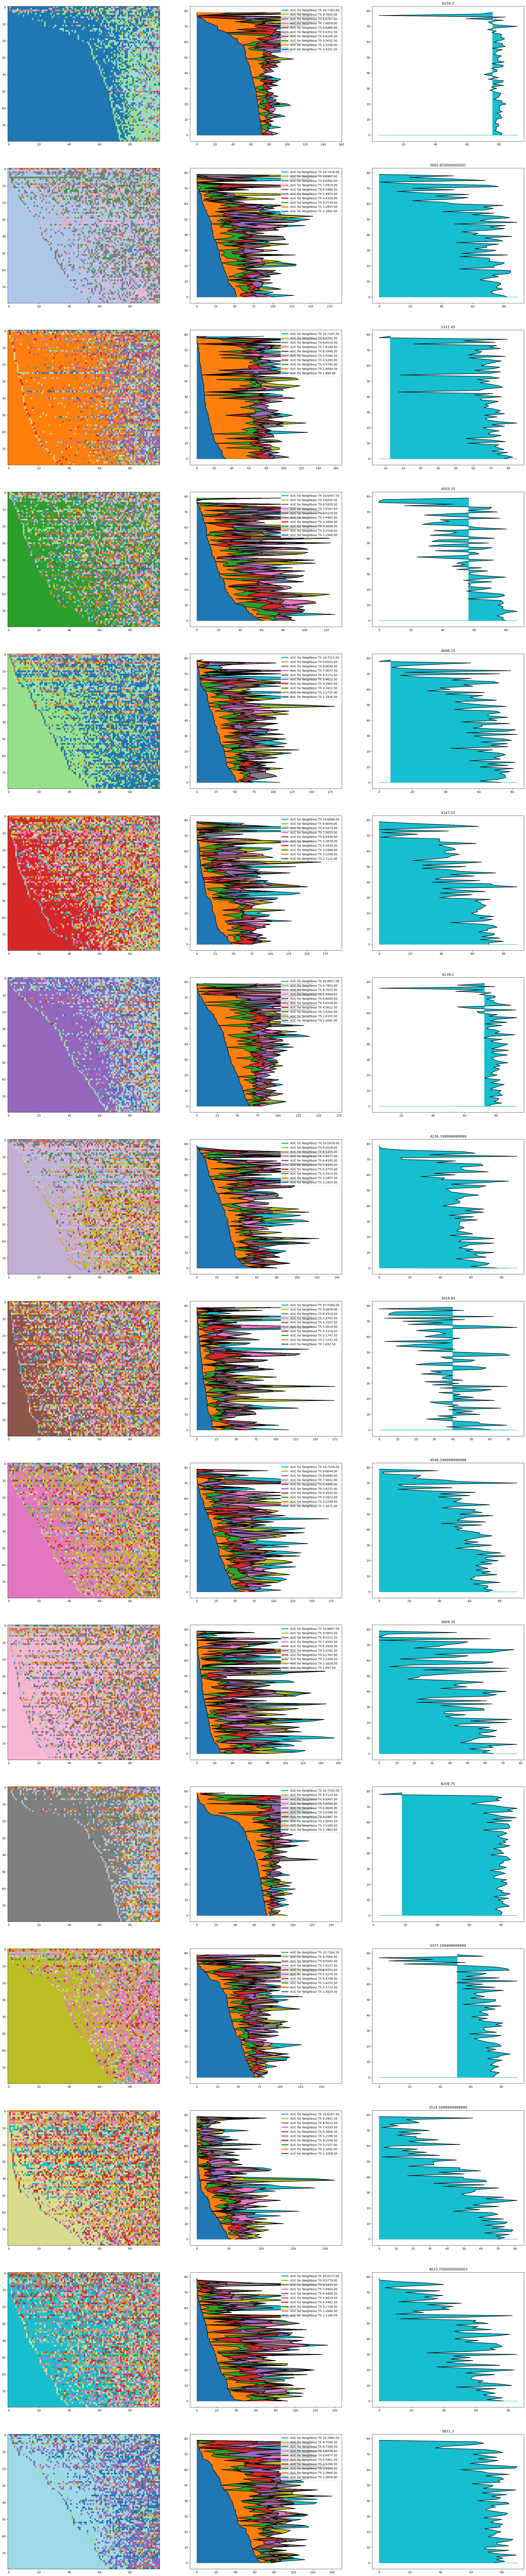

In [19]:
from scipy.integrate import simpson
from numpy import trapz

cmap = matplotlib.cm.get_cmap('tab10')

fig = plt.figure(2, figsize=(32, 160))
n = len(classes)
axes = fig.subplots(nrows=n, ncols=3)

for i, c in zip(list(range(n)), classes[:n+1]):
    
    space, df = get_sorted_k_space(v_dicts[c])
        
    axes[i][0].imshow(space[:, :100], cmap="tab20", aspect="auto")
    
    legend_elements = []
    for th in reversed(range(1, 11)):
        # Compute the area using the composite trapezoidal rule.
        area = trapz(df[f"length{th}"], dx=1)
        # Compute the area using the composite Simpson's rule.
        # area = simpson(length, dx=1)
    
        axes[i][1].plot(df[f"length{th}"].tolist()[::-1], list(range(80)), 'k')
        axes[i][1].fill_betweenx(list(range(80)), df[f"length{th}"].tolist()[::-1], color=cmap(th-1))
        
        legend_elements.append(Line2D([0], [0], color=cmap(th-1), lw=4, label=f"AUC for Neighbour Th {th}:{area:.2f}"))
        
        if th == 0:
            axes[i][0].set(yticks=[], title=f"AUC-> Trapz:{area}")
    
    axes[i][1].legend(handles=legend_elements, loc='upper right')
        
    # Compute the area using the composite trapezoidal rule.
    area = trapz(df[f"mean_length"], dx=1)
    # Compute the area using the composite Simpson's rule.
    # area = simpson(length, dx=1)
    
    axes[i][2].plot(df[f"mean_length"].tolist()[::-1], list(range(80)), 'k')
    axes[i][2].fill_betweenx(list(range(80)), df[f"mean_length"].tolist()[::-1], color=cmap(10))
    axes[i][2].set(title=f"{area}")